### Comparative Analysis of Machine Learning Algorithms for Customer Churn Prediction.
The aim of this project is to
1.	Understand which  machine learning algorithm -Stochastic Gradient Boosting (SGB), Support Vector Machine (SVM) and Random Forest provides the most accurate predictions for customer churn.
2.	And to determin the extent to which  hyperparameter tuning using techniques like Grid Search or Random Search enhances the performance of the algorithms in predicting customer churn.


In [ ]:
# Importing modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
! pip install imblearn
from imblearn import over_sampling
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
# Importing dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
# Viewing the top 5 rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Understanding basic information about the dataset
df.info() # In the project, the dataset consist of 7043 rows and 21 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# From the column information, Total charges column is categorical instead of numerical.
# Changing the Total charges data type to a numerical one

# Converting the data to a float
df['TotalCharges'] = df['TotalCharges'].str.strip() # Remove leading/trailing whitespace
df['TotalCharges'] = df['TotalCharges'].replace('', np.nan)  # Replace empty strings with NaN
df['TotalCharges'] = df['TotalCharges'].astype(float)  # Convert to float

In [ ]:
# Checking if the dataset contains missing values
df.isna().sum() # data contains  missing values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Understanding descriptive statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Exploring the data

<Axes: xlabel='Churn', ylabel='count'>

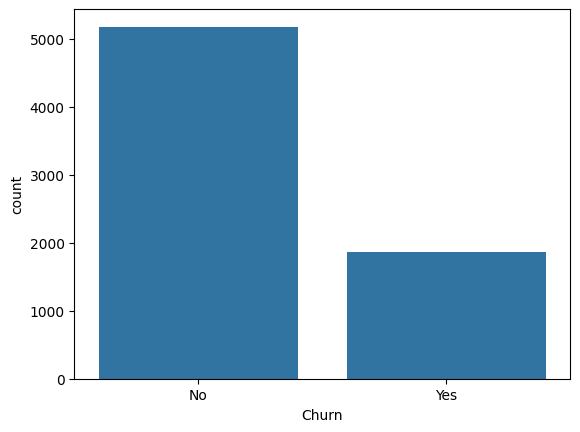

In [ ]:
# Checking the distribution of the target variable
sns.countplot(x='Churn', data=df) # From the graph the target distribution is inbalance, hence, i have to make balance

In [ ]:
# Checking the percentage distribution
df['Churn'].value_counts(normalize=True)*100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [ ]:
# Understanding the relationship between variables
df[['SeniorCitizen',	'tenure',	'MonthlyCharges',	'TotalCharges']].corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


<Axes: >

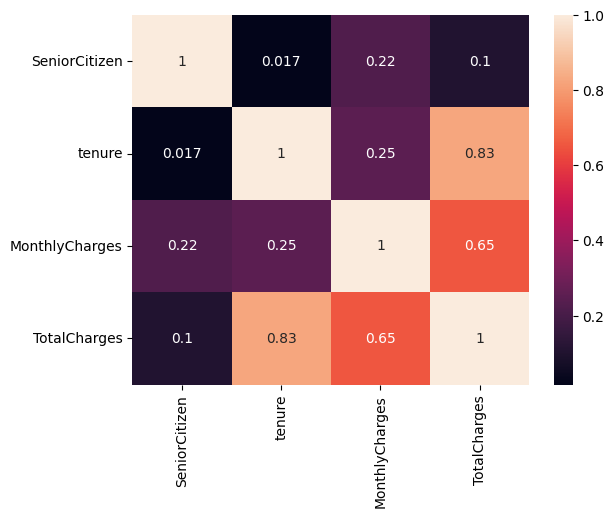

In [ ]:
# Visualing the relationship with the
sns.heatmap(df[['SeniorCitizen',	'tenure',	'MonthlyCharges',	'TotalCharges']].corr(), annot=True)

<Axes: >

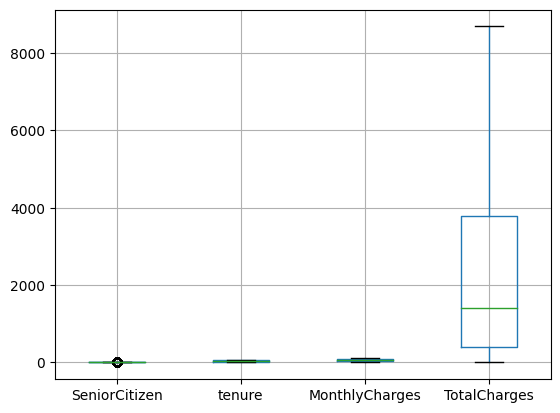

In [ ]:
# Checking for Outliers in the data

out_detect =df[['SeniorCitizen', 'tenure', 'MonthlyCharges' ,'TotalCharges']]

out_detect.boxplot()

### Data Preprocessing

I  will be preprocessing the data based on the exploration I did to make the data suitable for modelling

In [ ]:
# Dropping misssing values

df=df.dropna()
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Dropping reduncdant variables

df.drop('customerID', axis=1, inplace=True)

df

<ipython-input-14-f2699a2e3d02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('customerID', axis=1, inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# Encoding the categoricals variables

# Defining  the categorical variables

categorical = ['gender', 'Partner', 'Dependents','PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity',
               'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
               'PaymentMethod']

df = pd.get_dummies(df,columns=categorical, drop_first=True)

In [ ]:
# Defining dependent and independent variable

X= df.drop('Churn', axis=1) # Independent variable
y= df['Churn'] # independent Variable

In [ ]:
# Addressing the class imbalance
sm = over_sampling.SMOTE()
X_res, y_res = sm.fit_resample(X,y)

<Axes: xlabel='Churn', ylabel='count'>

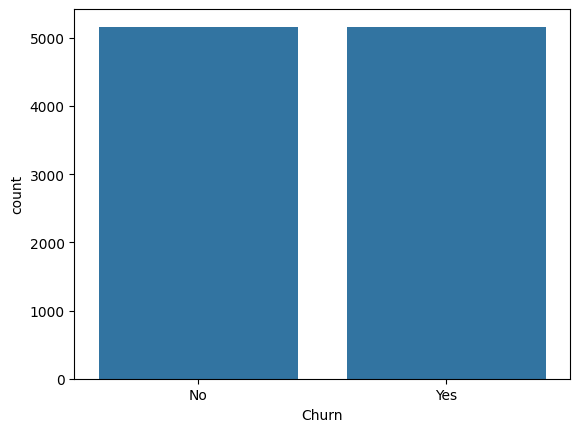

In [ ]:
# Visualizing the data after addressing the class imbalance

sns.countplot(x=y_res)

In [ ]:
# Splitting the data into training and testing data

X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
# Normalizing the data.
scaler =StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Building the Models

Here, i will train & test the ML model. i will be employing-Stochastic Gradient Boosting (SGB), Support Vector Machine (SVM) and Random Forest algorithims  to build my models.

### Gradient Boosting Classifier

In [ ]:
# Initialize the Stochastic Gradient Boosting Classifier
sgb_classifier = SGDClassifier(random_state =121)

# Fit the model
sgb_classifier.fit(X_train_scaled, y_train)

# Checking how well the model learnt the data
sgb_accuracy= sgb_classifier.score(X_train_scaled,y_train)

print(sgb_accuracy * 100)

78.23284034888131


In [ ]:
# Predict the test set
sgb_pred = sgb_classifier.predict(X_test_scaled)

# Evaluate the classifier
sgb_accuracy_t = metrics.accuracy_score(y_test, sgb_pred)

print(sgb_accuracy_t * 100)

80.773606370876


###  Random Forest

In [ ]:
# instantiating the Random Forest Tree Model to build the model
random_model=RandomForestClassifier(random_state =121)

# Fitting the Model to the training data
random_model.fit(X_train_scaled,y_train)

# Checking how well the model learnt the data
random_accuracy= random_model.score(X_train_scaled,y_train)

print(random_accuracy * 100)

99.82935153583618


In [ ]:
# Testing the Model performance on the test data
random_prediction =random_model.predict(X_test_scaled)

# Evaluating the model prediction on test data
random_accuracy_t=metrics.accuracy_score(y_test, random_prediction)

# printing the score
print(random_accuracy_t *100)

79.46530147895335


### Support Vector Machine

In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train_scaled, y_train)

# Checking how well the model learnt the data
svm_accuracy= svm_classifier.score(X_train_scaled,y_train)

print(svm_accuracy * 100)

81.34243458475541


In [ ]:
# Predict on the test set
svm_pred = svm_classifier.predict(X_test_scaled)

# Calculate the accuracy of the classifier
svm_accuracy_t = metrics.accuracy_score(y_test, svm_pred)

print(svm_accuracy_t * 100)

81.45620022753128


Text(0.5, 1.0, 'Comparison of Model Accuracy Scores on Test Data')

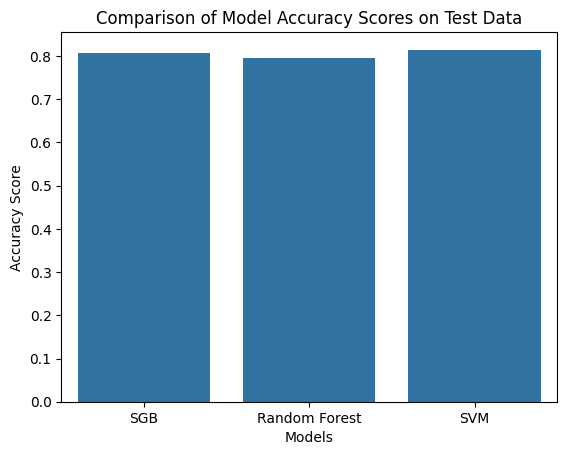

In [ ]:
# Visualizing the result for better understanding
model_name= ['SGB', 'Random Forest', 'SVM']
model_accuracy =[sgb_accuracy_t, random_accuracy_t, svm_accuracy_t]

sns.barplot(x=model_name, y=model_accuracy)
# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores on Test Data')

### Hyperparameter tuning
Employing the randomsearch hyperparameter for a comphrensive  parameter tuning for each model

In [ ]:
# Define the reduced parameter distribution for RandomizedSearchCV for SVC
param_dist_svm = {
    'C': uniform(0.1, 5),  # Reduced the range
    'kernel': ['linear', 'rbf'],  # Reduced to the most common kernels
    'degree': randint(2, 4),  # Reduced the range
    'gamma': ['scale', 'auto'],
    'coef0': uniform(0.0, 0.5),  # Reduced the range
    'class_weight': [None, 'balanced']
}
# Create the RandomizedSearchCV object with 1000 iterations
random_search_svm = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_dist_svm, n_iter=100, cv=3, scoring='accuracy', n_jobs=-1, random_state=42, verbose=2)

# Fit the model
random_search_svm.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
# Define the parameter distribution for RandomizedSearchCV for SGBClassifier
param_dist_sgb = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['none', 'l2', 'l1', 'elasticnet'],
    'alpha': uniform(1e-4, 1e-2),
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': uniform(1e-3, 1e-1),
    'max_iter': [1000, 2000, 3000, 4000, 5000]
}

# Create the RandomizedSearchCV object with 1000 iterations
random_search_sgb = RandomizedSearchCV(
    estimator=SGBClassifier(),
    param_distributions=param_dist_sgB,
    n_iter=1000,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit the model
random_search_sgd.fit(X_train, y_train)



In [ ]:
# Print the best parameters and best score
print(f"Best parameters found: {random_search_sgb.best_params_}")
print(f"Best accuracy score: {random_search_sgb.best_score_ * 100}")

In [ ]:
# Define the parameter distribution for RandomizedSearchCV For Random Forest
param_dist_rf = {
    'n_estimators': randint(100, 501),
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': randint(2, 21),
    'min_samples_leaf': randint(1, 7),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Create the RandomizedSearchCV object with 1000 iterations
random_search_rf = RandomizedSearchCV(estimator=random_model, param_distributions=param_dist_rf, n_iter=1000, cv=5, scoring='accuracy', n_jobs=-1, random_state=42, verbose=2)

# Fit the model
random_search_rf.fit(X_train, y_train)


In [ ]:
# Print the best parameters and best score
print(f"Best parameters found: {random_search_rf.best_params_}")
print(f"Best accuracy score: {random_search_rf.best_score_ * 100}")